# Enhanced protein isoform characterization through long-read proteogenomics 
## Supplementary Figure 2c-d
---
Ben Jordan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import config
import matplotlib
matplotlib.rc('font', **config.font)


### Supplementary Fig. 2: Generation and characterization of candidate protein isoform sequences from long-read RNA-seq data. 

 c, Distribution of the number of protein isoforms per gene. d, Bar chart showing the number of genes that contain all known protein isoforms. Data based on the filtered PacBio database (~45K protein isoforms). 

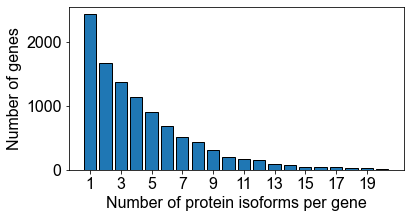

<Figure size 432x288 with 0 Axes>

In [7]:
filtered_database_file = f'{config.PIPELINE_RESULTS_DIRECTORY}/protein_filter/{config.EXPERIMENT_NAME}.classification_filtered.tsv' # ~45K prot

# plot the distribution of protein number per gene, for filtered protein database
db_type = 'filtered'
db_file = filtered_database_file
db = pd.read_table(db_file)
db['gene'] = db['pr_gene']
# only consider entries at 1 CPM or higher
db = db[~db['gene'].str.startswith('novel')]
genes = db.groupby('pr_gene').size().reset_index()
genes.columns = ['gene', 'num_transcripts']
num_iso = genes.groupby('num_transcripts').size().reset_index(name='count')
fig = plt.subplots(figsize=(6,3))
plt.bar(num_iso['num_transcripts'][0:20], num_iso['count'][0:20], edgecolor='black')
plt.xticks(range(1, 21, 2))
plt.xlabel('Number of protein isoforms per gene')
plt.ylabel('Number of genes')
plt.savefig(f'plot/SuppFig2c_hist_num_prot_iso_per_gene_{db_type}.pdf', bbox_inches='tight')
plt.show()
plt.clf()

num_iso.to_csv(f'stats/SuppFig2c_hist_num_prot_iso_per_gene_{db_type}.tsv', sep='\t',index=False)

### Supplementary Fig. 2: Generation and characterization of candidate protein isoform sequences from long-read RNA-seq data. 

d, Bar chart showing the number of genes that contain all known protein isoforms. Data based on the filtered PacBio database (~45K protein isoforms).

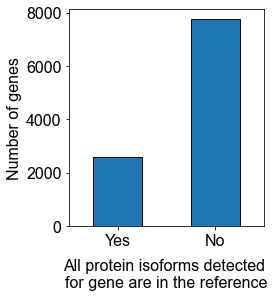

<Figure size 432x288 with 0 Axes>

In [8]:


filtered_database_file = f'{config.PIPELINE_RESULTS_DIRECTORY}/protein_filter/{config.EXPERIMENT_NAME}.classification_filtered.tsv' # ~45K prot

prots = pd.read_table(filtered_database_file)
prots['gene'] = prots['pr_gene']

# plot distribution of genes with all known isoforms
def all_proteins_are_known_for_gene(row):
    if set(row['pclass'].to_list()) == set(['pFSM']):
        return True
    return False
prots_novel_status = prots.groupby('gene').apply(all_proteins_are_known_for_gene).reset_index()
prots_novel_status.columns = ['gene', 'all_protein_isoforms_known']
prots_novel_status = prots_novel_status.groupby('all_protein_isoforms_known').size().reset_index()
prots_novel_status.columns = ['All known', 'Count']
prots_novel_status = prots_novel_status.sort_values('All known', ascending=False)
prots_novel_status.plot.bar(x='All known', y='Count', rot=0, edgecolor='black', legend=False, figsize=(3.5,4), zorder=10)
plt.xlabel('All protein isoforms detected \nfor gene are in the reference', labelpad=10)
plt.xticks([0, 1], ['Yes', 'No'])
plt.ylabel('Number of genes')
# plt.grid(zorder=0, axis='y')
plt.savefig('plot/SuppFig2d_bar_gene_and_prot_iso_novelty_cat.pdf', bbox_inches='tight')
plt.show()
plt.clf()
# output source data table
prots_novel_status.to_csv('stats/SuppFig2d_bar_gene_and_prot_iso_novelty_cat.tsv', sep='\t', index=None)
